In [ ]:
#Description: Thjhis program uses bollinger band Strategy to determine when to buy and sell stock

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load the data
from google.colab import files
files.upload()

Saving TSLA.csv to TSLA.csv


{'TSLA.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300\n2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100\n2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800\n2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800\n2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900\n2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700\n2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400\n2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600\n2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500\n2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100\n2010-07-14,17.940001,20.150000,17.760000,19.840000,19.840000,4195200\n2010-07-15,19.940001,21.500000,19.000000,19.889999,19.889999,3739800\n2010-07-16,20.700001,21.299999,20.049999,20.639999,20.639999,2621300\n2010-07-19,21.370001,22.250000

In [ ]:
#get the data
df = pd.read_csv('TSLA.csv')
#Set the index to be the data
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2010-06-29,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2020-01-31,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


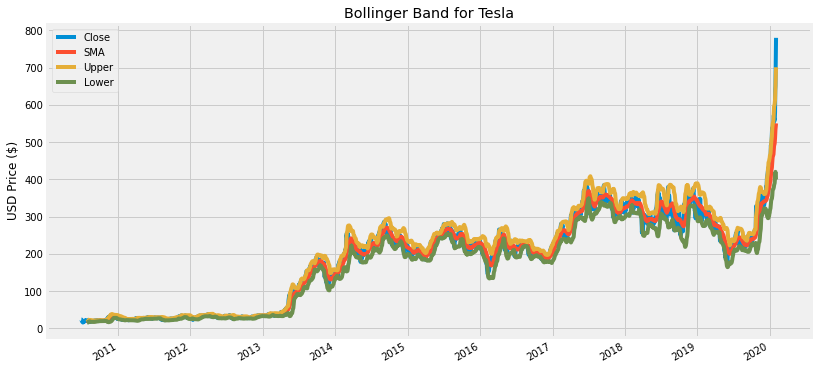

In [ ]:
#Calculate the simple moving average, standard deviation, upper band and the lower band
#Get teh time period (20 days)
period = 20
#Calculate the Simple Moving Average (SMA)
df['SMA'] = df['Close'].rolling(window=period).mean()
#get the standard deviation
df['STD'] = df['Close'].rolling(window=period).std()
#Calculate the upper Bollinger band
df['Upper'] = df['SMA'] + (df['STD'] * 2)
#Calculate the lower Bollinger band
df['Lower'] = df['SMA'] - (df['STD'] * 2)

#Create a list of columns to keep
column_list = ['Close', 'SMA', 'Upper', 'Lower']
#plot the data
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('Bollinger Band for Tesla')
plt.ylabel('USD Price ($)')
plt.show()

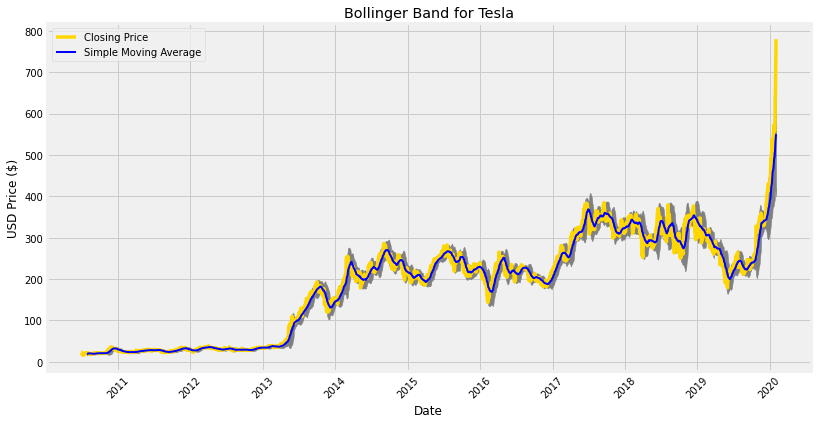

In [ ]:
#plot and shape the area between the two Bollinger bands
#get the figure and the figure size
fig = plt.figure(figsize=(12.2, 6.4))
#Add the subplot
ax = fig.add_subplot(1,1,1)
#Get the index values of the data frame
x_axis = df.index
#plot and shade the area between the upper band and the lower band grey
ax.fill_between(x_axis, df['Upper'], df['Lower'], color = 'grey')
#plot the closing price and moving average
ax.plot(x_axis, df['Close'], color = 'gold', lw = 3.5, label = 'Closing Price')
ax.plot(x_axis, df['SMA'], color = 'blue', lw = 2, label = 'Simple Moving Average')
#Set the title and show the image
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()

In [ ]:
#Create a new data frame
new_df = df[period-1:]
#Show the new data
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
2010-07-27,2010-07-27,20.910000,21.180000,20.260000,20.549999,20.549999,619700,19.871500,2.296462,24.464424,15.278575
2010-07-28,2010-07-28,20.549999,20.900000,20.510000,20.719999,20.719999,467200,19.713000,2.106009,23.925018,15.500981
2010-07-29,2010-07-29,20.770000,20.879999,20.000000,20.350000,20.350000,616000,19.539000,1.879540,23.298081,15.779919
2010-07-30,2010-07-30,20.200001,20.440001,19.549999,19.940001,19.940001,426900,19.438000,1.794968,23.027937,15.848063
2010-08-02,2010-08-02,20.500000,20.969999,20.330000,20.920000,20.920000,718100,19.524000,1.823936,23.171871,15.876129
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,503.125003,52.849644,608.824291,397.425715
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,511.439502,51.262981,613.965465,408.913539
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,522.563503,54.057692,630.678887,414.448118
2020-01-31,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,533.579002,56.643555,646.866112,420.291893


In [ ]:
#Create at function to get the buy and sell signals
def get_signal(data):

  buy_signal = []
  sell_signal = []

  for i in range(len(data['Close'])):
    if data['Close'][i] > data['Upper'][i]:#Then you should Sell
       buy_signal.append(np.nan)
       sell_signal.append(data['Close'][i])
    elif data['Close'][i] < data['Lower'][i]:#Then You should Buy
      buy_signal.append(df['Close'][i])
      sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)


  return (buy_signal, sell_signal)   



In [ ]:
#Create two new Columns
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


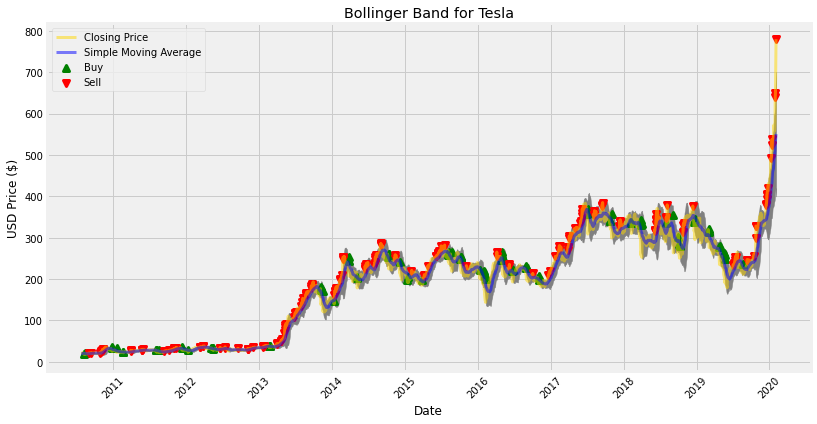

In [ ]:
#Plot all of the data
#get the figure and the figure size
fig = plt.figure(figsize=(12.2, 6.4))
#Add the subplot
ax = fig.add_subplot(1,1,1)
#Get the index values of the data frame
x_axis = new_df.index
#plot and shade the area between the upper band and the lower band grey
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color = 'grey')
#plot the closing price and moving average
ax.plot(x_axis, new_df['Close'], color = 'gold', lw = 3, label = 'Closing Price', alpha = 0.5)
ax.plot(x_axis, new_df['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average', alpha = 0.5)
ax.scatter(x_axis, new_df['Buy'], color = 'green', lw=3, label='Buy', marker = '^', alpha = 1)
ax.scatter(x_axis, new_df['Sell'], color = 'red', lw=3, label='Sell', marker = 'v', alpha = 1)
#Set the title and show the image
ax.set_title('Bollinger Band for Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()